## A Simple Analysis of Apple HR employee with respect to time
Apple is one of the biggest company in the world and this is not coming down any time soon. There are several factors that may have caused this and i will be looking into on of these factors from their employee perspective.

I got data of:
1. employees count from 1995 to 2023
2. revenue and net income from 2009 to 2023
3. diversity data in employees from 2014 to 2022
4. diversity data in leaders from 2014 to data
5. diversity data in sex for both leaders and employees from 2014 to 2022

There are several ways to check the success or profit of a company. Here i will be using the net income even though it is not the best as it can be affected by inflation and other factors as we know $1 20 years ago is not the same thing as $1 today, The purchasing power is different. 

For the purpose of simple analysis, I will keep all factor constant(ceteris paribus).
What i want to acheive in this analysis is to know how the change in employee statistics affect the net income

In [6]:
# importing my libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importing my data
employee_data = pd.read_csv('employee_data_apple.csv') # employees count from 1995 to 2023
data_race_diverse = pd.read_csv('employee_diversify_apple.csv') # diversity data in employees from 2014 to 2022
data_sex_diverse = pd.read_csv('employee_diversity_apple_sex.csv') # diversity data in sex for employee
leaders_race_diverse = pd.read_csv('leaders_diversity_apple.csv') # diversity data in leaders race 2014 to 2022
leaders_sex_diverse = pd.read_csv('leaders_diversity_apple_sex.csv') # diversity data in leaders  sex from 2014 to 2022
revenue_net_income = pd.read_csv('revenue_and_net_income_apple.csv') # revenue and net income from 2009 to 2023

# Display all data
print(employee_data.head())
print(data_race_diverse.head())
print(data_sex_diverse.head())
print(leaders_race_diverse.head())
print(leaders_race_diverse.head())
print(revenue_net_income.head())

   Date  Employees  Change
0  2023     161000   -3000
1  2022     164000   10000
2  2021     154000    7000
3  2020     147000   10000
4  2019     137000    5000
   overall   Asian  Black Hispanic/Latinx Indigenous Multiracial   White
0     2022  29.80%  9.20%          14.90%      0.70%       3.20%  42.10%
1     2021  27.90%  9.40%          14.80%      0.70%       3.20%  43.80%
2     2020     27%     9%             14%         1%          3%     47%
3     2019     24%     9%             14%         1%          3%     48%
4     2018     23%     9%             14%         1%          3%     50%
   year    male  female
0  2022  64.60%  35.30%
1  2021  65.20%  34.80%
2  2020     66%     34%
3  2019     67%     33%
4  2018     67%     33%
   year   Asian  Black Hispanic/Latinx Indigenous Mutliracial   White
0  2022  29.90%  4.40%           8.20%      0.40%       2.00%  55.10%
1  2021  29.20%  4.00%           7.80%      0.50%       1.70%  56.90%
2  2020     27%     4%              8%        

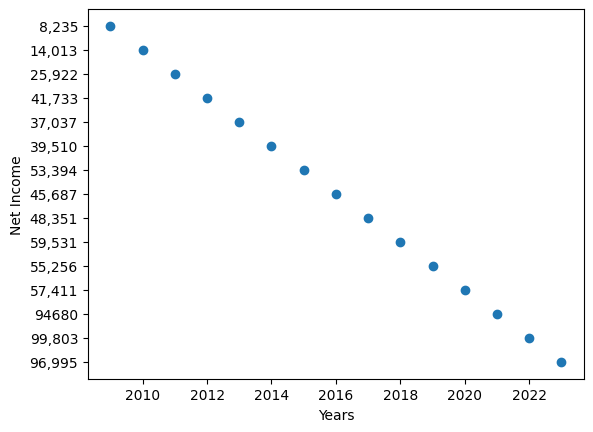

In [8]:
# viewing the net income per year
plt.scatter(revenue_net_income['year'], revenue_net_income['net_income'])
plt.xlabel('Years')
plt.ylabel('Net Income')
plt.show()